### Business Goal of the Assignment:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

<B>Approach taken:</B>

    1.Read, Categorising and visualizing the data

    2.Preparing the data for model training (train-test split, rescaling)

    3.Training the model

    4.Residual analysis

    5.Prediction and evaluation of the test set

In [380]:
#Importing the necessary Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

In [381]:
df_bikes=pd.read_csv("day.csv")

In [382]:
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [383]:
#Dropping unwanted columns like dteday which is already represented as month, workday, and year and instant
df_bikes = df_bikes.drop('dteday',axis = 1)
df_bikes = df_bikes.drop('instant',axis = 1)

In [384]:
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<b>Categorizing columns</b>

    mnth       : Categorizing into month January to December
    season     : Ctegorizing into four levels (Spring, Summer, Fall, Winter)
    weathersit : Categorizing into four levels (Clear, Mist, Light Snow and Heavy Rain)
    weekday    : Categorizing into Sun, Mon, Tue, Wed, Thu, Fri, Sat


In [385]:
df_bikes['weathersit'] = df_bikes.weathersit.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
df_bikes['season'] = df_bikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df_bikes['mnth']=df_bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_bikes['weekday']=df_bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [386]:
# Get the dummy variables for the feature 'weathersit'
status = pd.get_dummies(df_bikes['weathersit'])

# Check what the dataset 'status' looks like
status.head()

,Clear,Light Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [387]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['weathersit'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0


In [388]:
# Get the dummy variables for the feature 'season'
status = pd.get_dummies(df_bikes['season'])
# Check what the dataset 'status' looks like
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [389]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['season'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Light Snow,Mist,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,1,0,0


In [390]:
# Get the dummy variables for the feature 'weekday'
status = pd.get_dummies(df_bikes['weekday'])

# Check what the dataset 'status' looks like
status.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [391]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['weekday'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Mist,spring,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,1,1,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,1,1,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,1,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,1,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,0,0,0,1


In [392]:
# Get the dummy variables for the feature 'mnth'
status = pd.get_dummies(df_bikes['mnth'])

# Check what the dataset 'status' looks like
status.head()

,Apr,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [393]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df_bikes['mnth'], drop_first = True)

# Add the results to the original housing dataframe
df_bikes = pd.concat([df_bikes, status], axis = 1)

# Now let's see the head of our dataframe.
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


<b>Visualizing the Data</b>

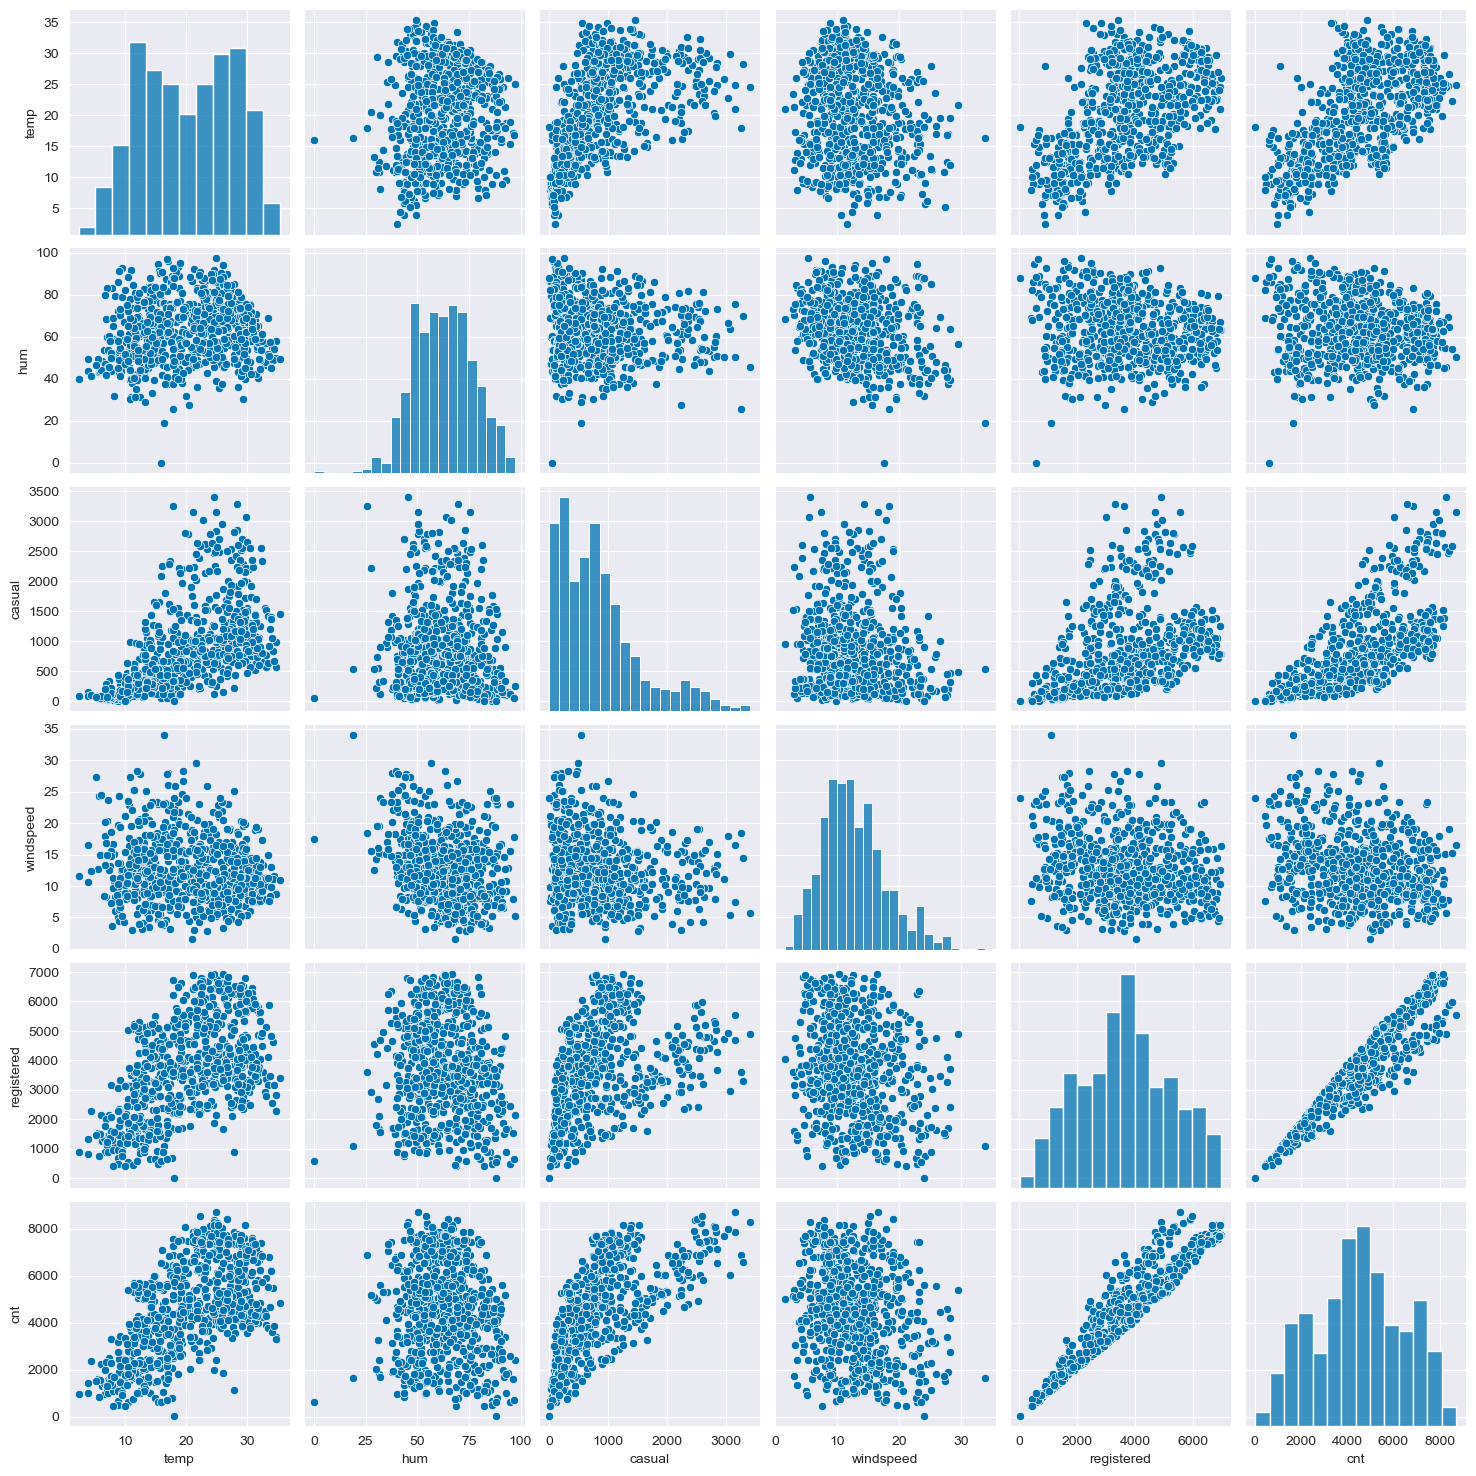

In [394]:
#visualizing the numeric variables of the dataset using pairplot 
sns.pairplot(df_bikes, vars=["temp", "hum",'casual','windspeed','registered','cnt'])
plt.show()

From the graph above, there is strong correlation between the count variable and temperature, humidity and windspeed

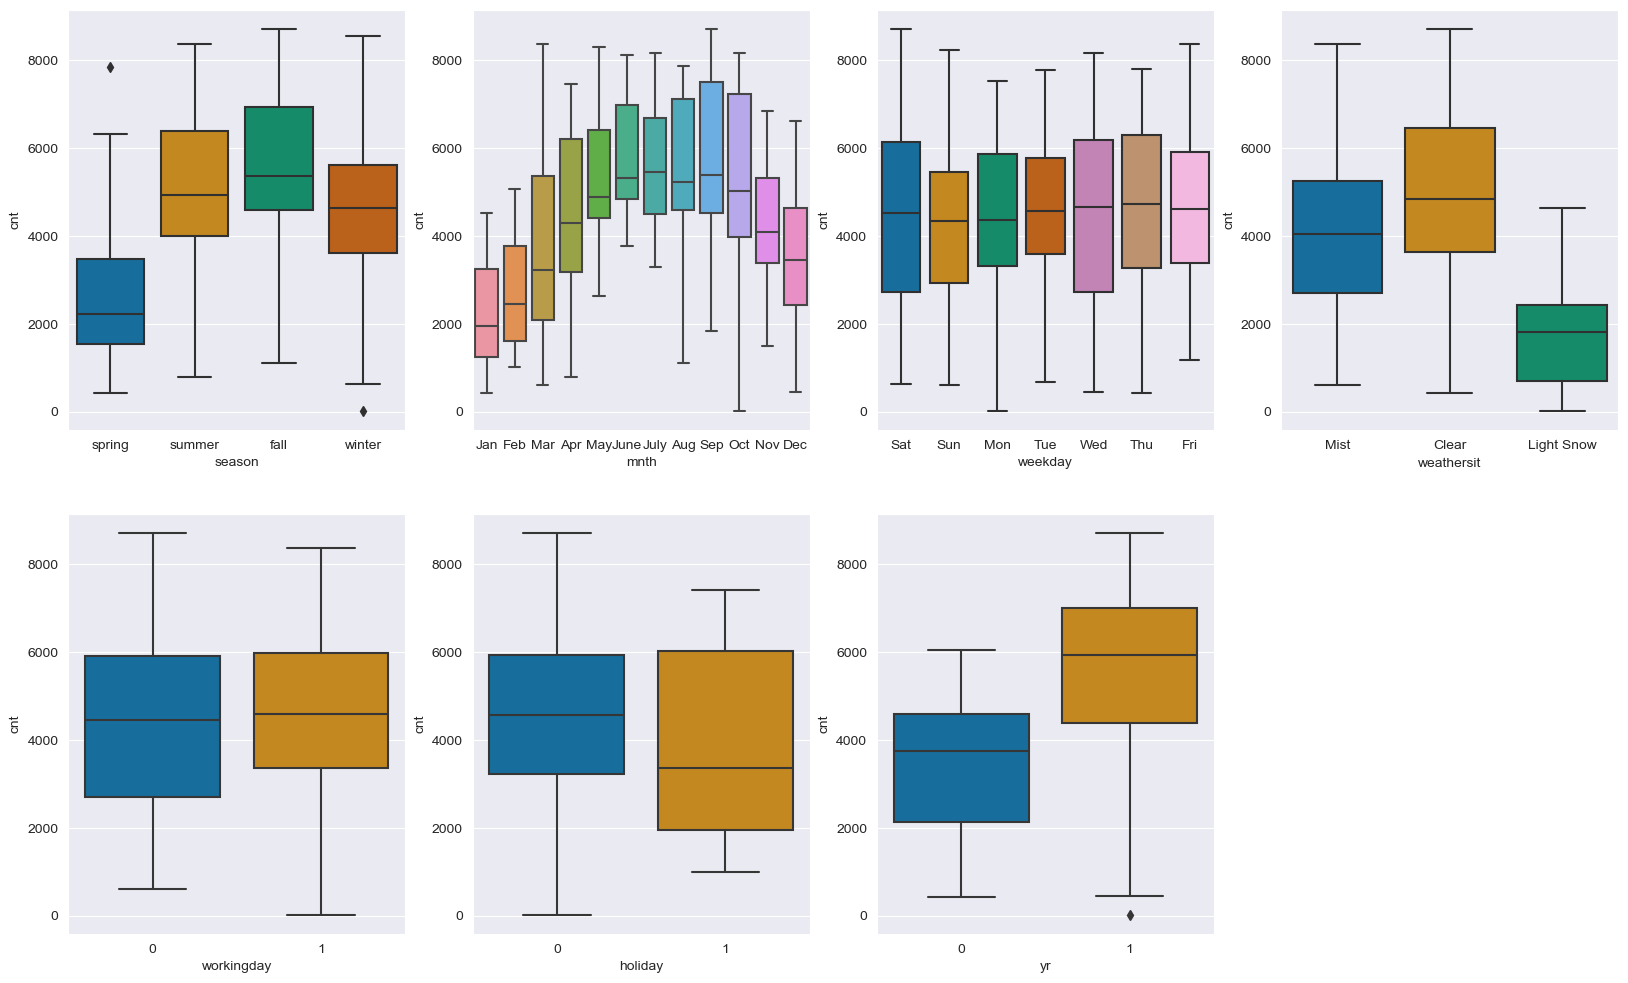

In [402]:
#visualizing the categorical variables of the dataset using boxplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df_bikes)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df_bikes)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df_bikes)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df_bikes)
plt.subplot(2, 4, 5)
sns.boxplot(x='workingday', y='cnt', data=df_bikes)
plt.subplot(2, 4, 6)
sns.boxplot(x='holiday', y='cnt', data=df_bikes)
plt.subplot(2, 4, 7)
sns.boxplot(x='yr', y='cnt', data=df_bikes)
plt.show()

<B> Findings: </B>

1. Demand is higher during Fall and Summar
2. June to October months registers higher demand
3. Clear weather postively impacts the demand of Bikes
4. People seems to prefer Bikes more during Holidays
5. Saturdays seems to be preferred amoung the weekends and Wednesday (mid-week) during the weekdays
6. Boom Bikes Business has significantly increased year on year and is higher in 2019 than 2018

<Axes: xlabel='mnth', ylabel='cnt'>

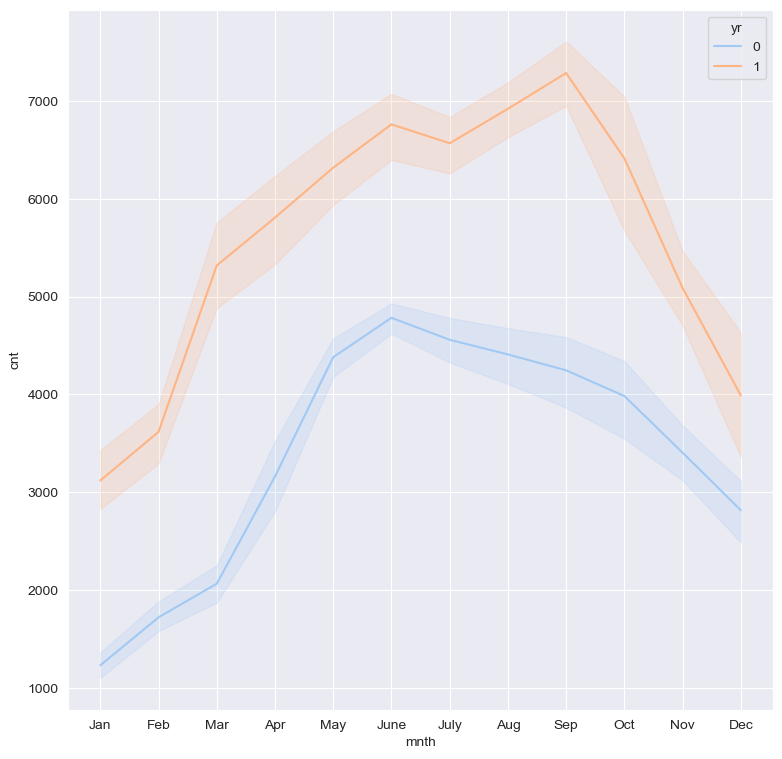

In [396]:
#visualizing the categorical variables of month by year

plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =df_bikes,y='cnt', x='mnth', hue ='yr',palette="pastel")

<B> Observations: </B>

    2019 Demand is higher every month compared to 2018
    June had the peak demand in the year 2018 whereas the highest demand is in the month of Sept in year 2019

C:\Users\deepak.sivaraman\AppData\Local\Temp\ipykernel_25808\2370288111.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bikes.corr(), annot = True, cmap="YlGnBu")


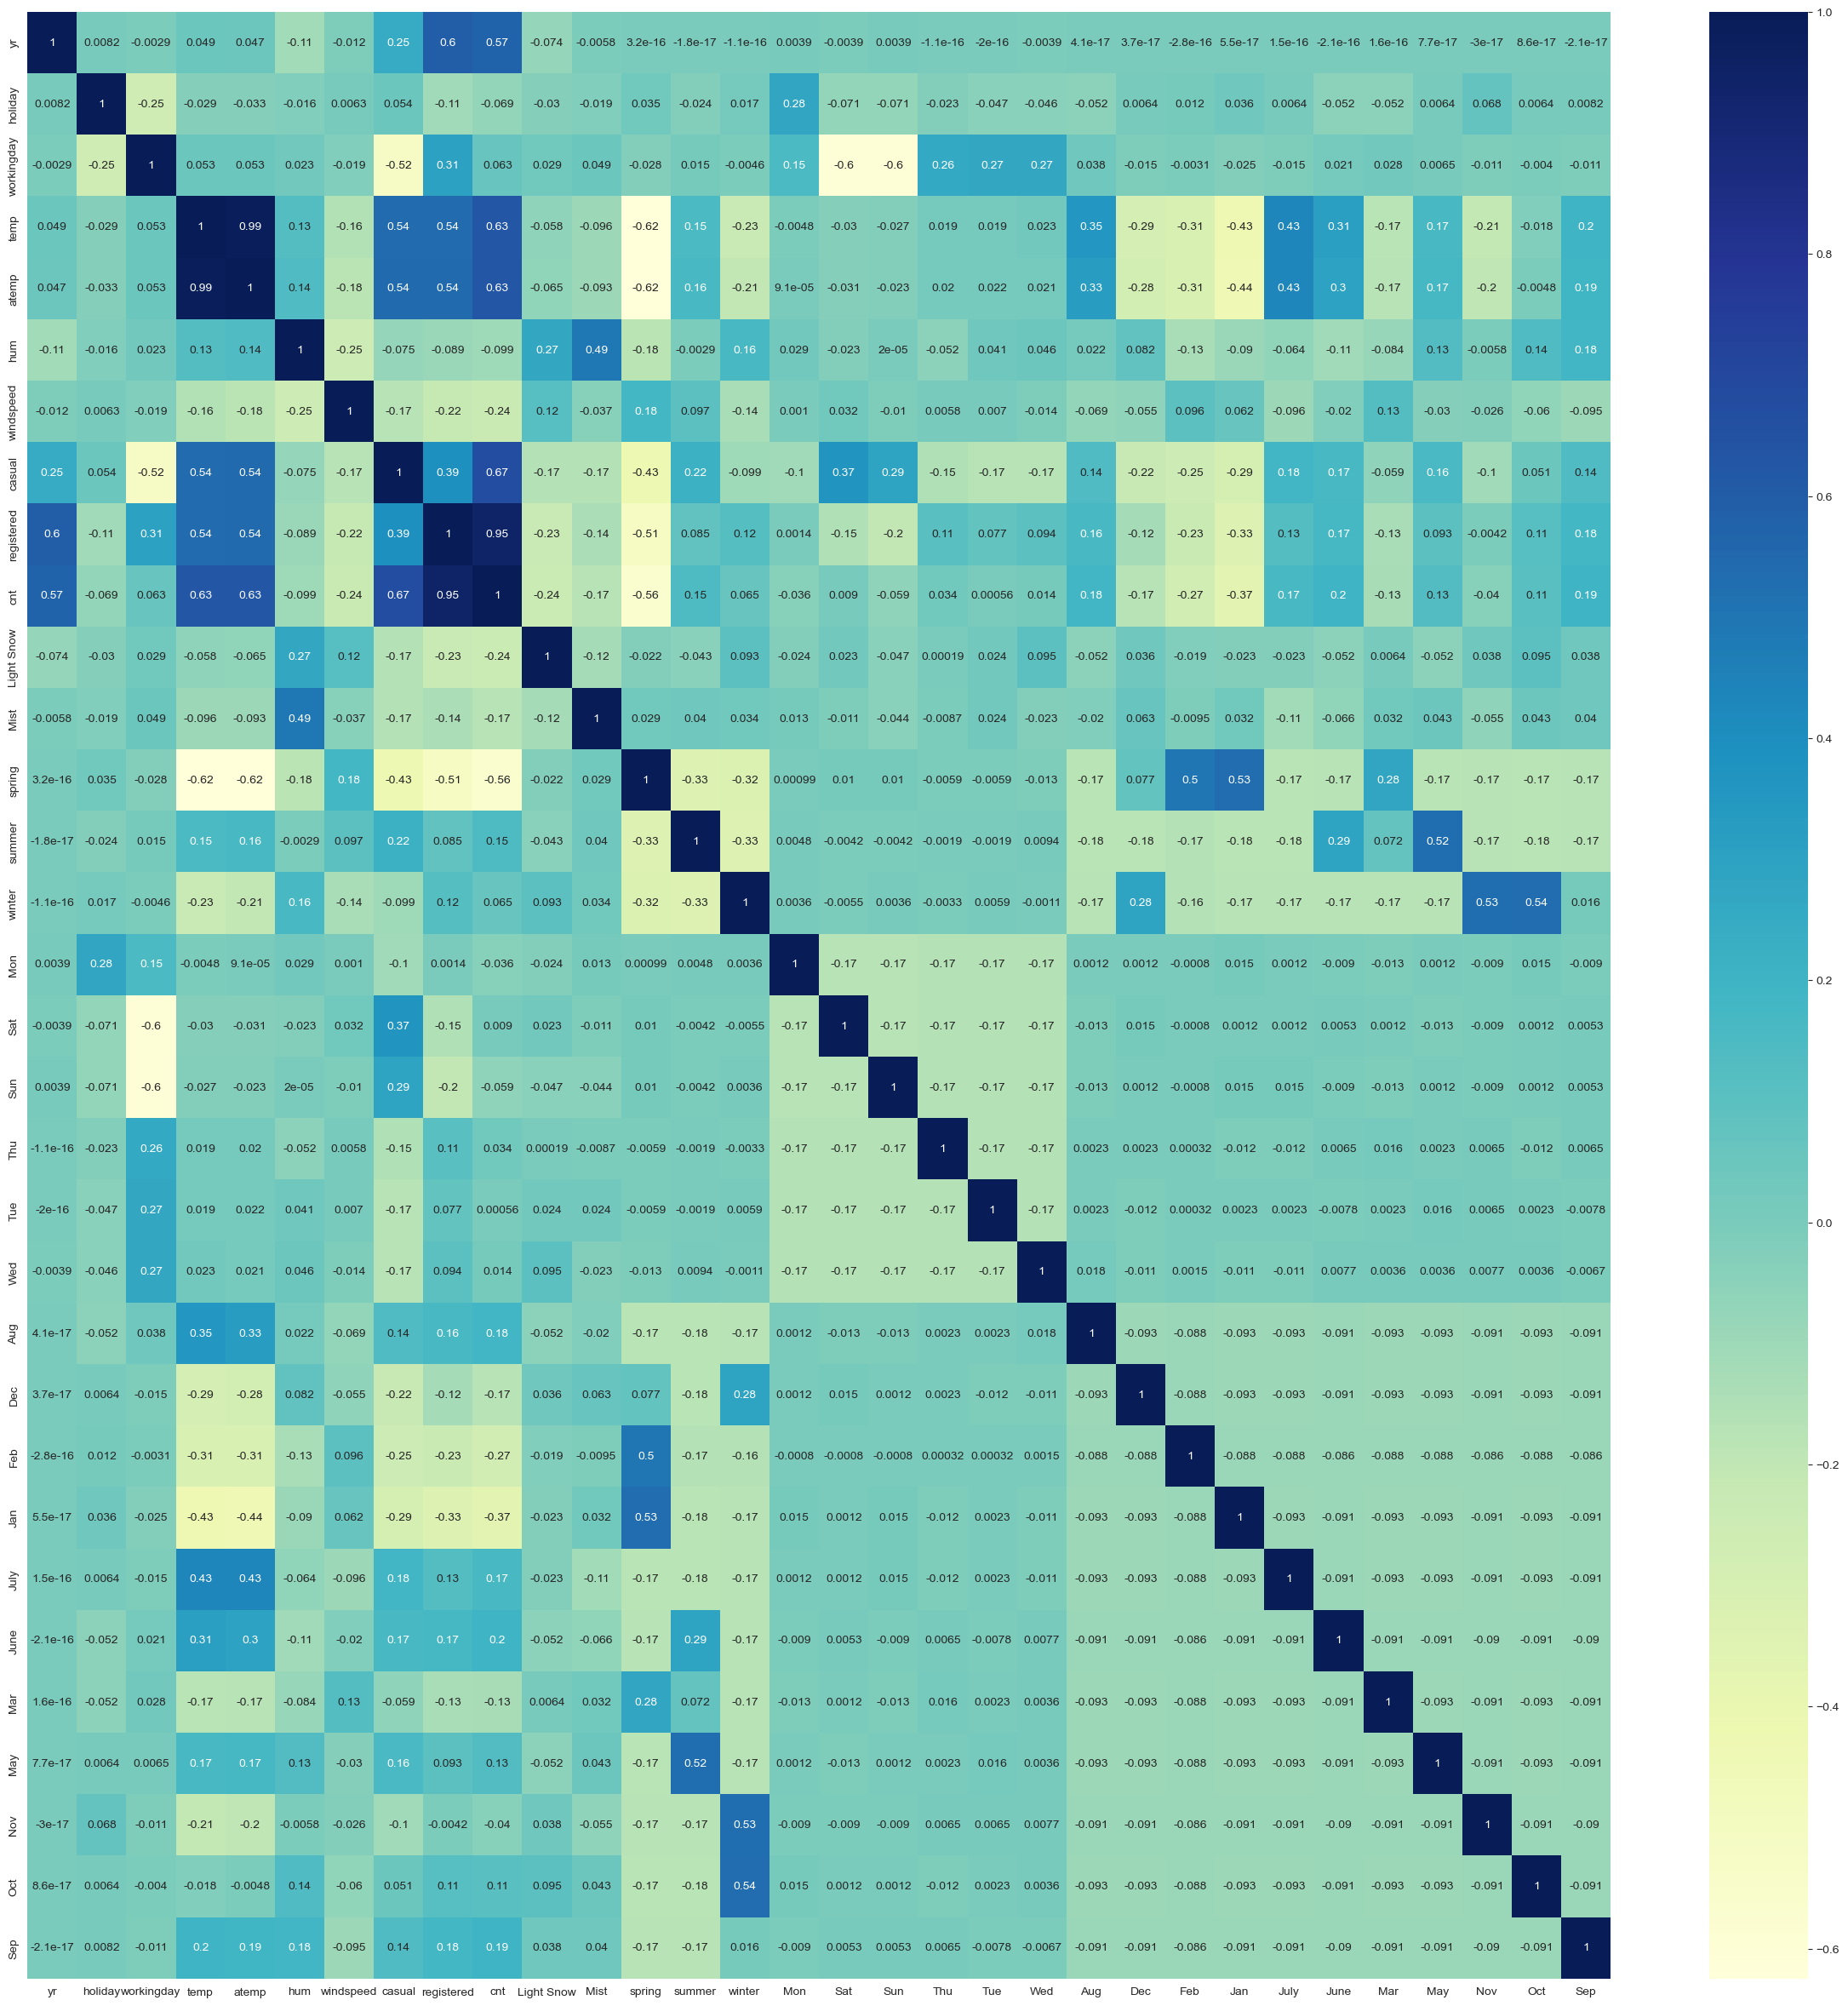

In [397]:
plt.figure(figsize = (30, 30))
sns.heatmap(df_bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

<B>Observations:</B>

    High correlation of temp and atemp variables which means one of them can be dropped
    Registered has a very high correlation with the Target Variable given that Target Variable is made up of Registered variable and hence can be dropped

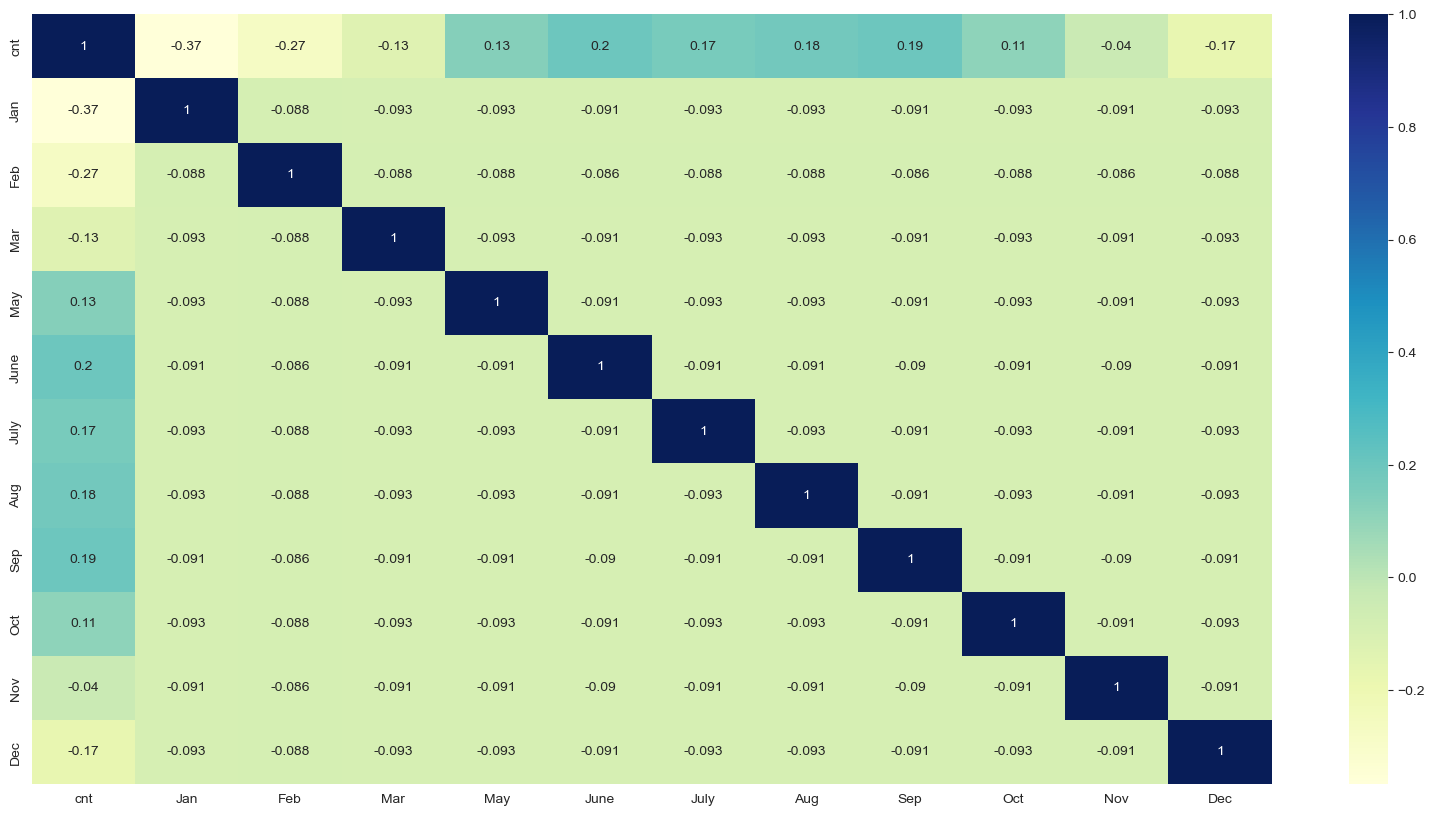

In [398]:
#Validating correlation of Months with Target Variable

plt.figure(figsize = (20,10))
sns.heatmap(df_bikes[['cnt','Jan','Feb','Mar','May','June','July' ,'Aug','Sep','Oct','Nov','Dec']].corr(),annot = True, cmap="YlGnBu")
plt.show()

<B>Observations:</B>

    Month of September has the highest demand
    Basically in the Summer and Fall Season BOOM Bikes can expect more number demand for Rent of Bikes.

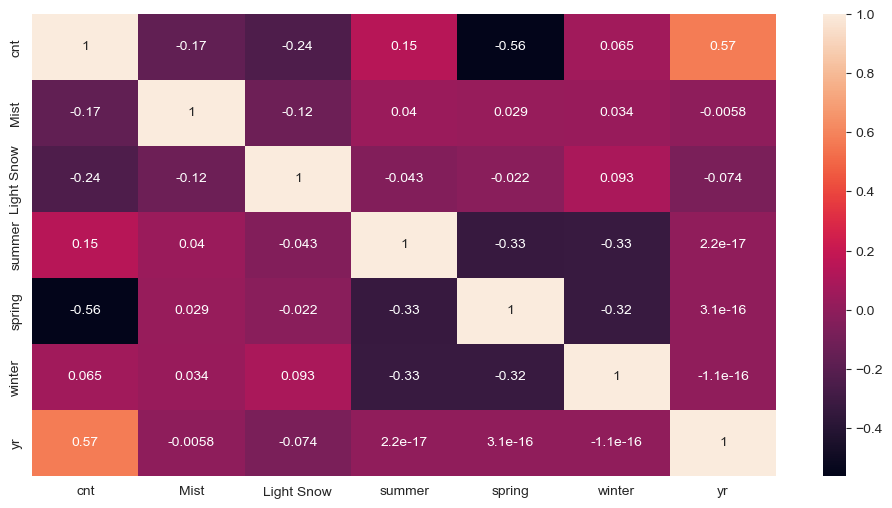

In [404]:
plt.figure(figsize = (12,6))
sns.heatmap(df_bikes[['cnt','Mist','Light Snow','summer','spring','winter','yr']].corr(),annot =True)
plt.show()

<B>Observations:</B>

    Demand is higher in Winter season
    Enivornmental elements seems to negatively impact the demand

In [302]:
# Drop 'weekday' as we have created the dummies for it
df_bikes.drop(['mnth'], axis = 1, inplace = True)
# Drop 'weathersit' as we have created the dummies for it
df_bikes.drop(['weathersit'], axis = 1, inplace = True)
# Drop 'weekday' as we have created the dummies for it
df_bikes.drop(['weekday'], axis = 1, inplace = True)
# Drop 'season' as we have created the dummies for it
df_bikes.drop(['season'], axis = 1, inplace = True)
# Drop 'atemp' as we have temp which has a direct correlation
df_bikes.drop(['atemp'], axis = 1, inplace = True)
# Drop 'Registered' as it seems from the Co-relation chart that it has the highest co-relation
df_bikes.drop(['registered'], axis = 1, inplace = True)
# Drop 'Casual' as it is already part of CNT our Target value
df_bikes.drop(['casual'], axis = 1, inplace = True)

df_bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Light Snow,Mist,spring,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [303]:
#checking for null values

df_bikes.isnull().sum()

yr            0
holiday       0
workingday    0
temp          0
hum           0
windspeed     0
cnt           0
Light Snow    0
Mist          0
spring        0
summer        0
winter        0
Mon           0
Sat           0
Sun           0
Thu           0
Tue           0
Wed           0
Aug           0
Dec           0
Feb           0
Jan           0
July          0
June          0
Mar           0
May           0
Nov           0
Oct           0
Sep           0
dtype: int64

### MIN MAX and Standardization method

In [304]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [305]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [306]:
# Apply scaler() to all the columns except the categorical, Binary and 'dummy' variables
num_vars = ['temp', 'windspeed','hum','cnt']

# For the Training Data Fit and Transform both need to done.
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

### RFE Method

In [307]:
# Create Training Dataset
y_train = df_train['cnt']
X_train = df_train.loc[:, df_bikes.columns != 'cnt']

In [308]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [309]:
# Execute RFE
rfe = RFE(lm, step = 10)
rfe = rfe.fit(X_train, y_train)

In [310]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', False, 3),
 ('Thu', False, 3),
 ('Tue', False, 3),
 ('Wed', False, 3),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', False, 2),
 ('Oct', False, 3),
 ('Sep', True, 1)]

In [311]:
# RFE Selected Features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Light Snow', 'Mist',
       'spring', 'winter', 'Sat', 'Dec', 'Jan', 'July', 'Sep'],
      dtype='object')

In [312]:
# REF Rejeted Features
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Feb',
       'June', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [313]:
# Creating X train with RFE Selected Variables
X_train_rfe = X_train[col]

In [314]:
#Adding Constant
X_train_rfe = sm.add_constant(X_train_rfe)

# Create Object for the Model
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

# View Statistics Summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          6.70e-188
Time:                        16:49:25   Log-Likelihood:                 508.87
No. Observations:                 510   AIC:                            -987.7
Df Residuals:                     495   BIC:                            -924.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3493      0.032     11.051      0.0

In [315]:
# Drop SAT column since the P value is more than 0.05
X_train_rfe = X_train_rfe.drop('Sat',axis=1)
X_train_rfe.columns

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          1.80e-188
Time:                        16:49:54   Log-Likelihood:                 507.47
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     496   BIC:                            -927.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3535      0.032     11.202      0.0

In [316]:
# Drop DEC column since the P value is more than 0.05
X_train_rfe = X_train_rfe.drop('Dec',axis=1)
X_train_rfe.columns

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):          5.52e-189
Time:                        16:50:07   Log-Likelihood:                 505.89
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3474      0.031     11.052      0.0

In [317]:
# Calculation of VIF to see if we have any outliers
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,60.97
3,temp,3.18
8,spring,2.72
4,hum,1.89
9,winter,1.81
7,Mist,1.56
10,Jan,1.55
11,July,1.30
6,Light Snow,1.24
5,windspeed,1.19


<B>Model Summary:</b>

    1. R Squared value of the Model is around 84% which means 84% of the variance in the count quantity is explained with 
    all the variables and Adjusted is 83.6%
    2. All the P Value of the features are less than 0.05
    3. Prob(F-statistic) is very low which indicates that Overall model is a good Fit.
    4. VIF should be generally <5 and we have achieved that condition with all the variables.
    

### Residual Analysis

In [328]:
# Calculation of Error in Prediction for Training Data
y_train_pred = lm.predict(X_train_rfe)
res = (y_train - y_train_pred)

C:\Users\deepak.sivaraman\AppData\Local\Temp\ipykernel_25808\4227395787.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


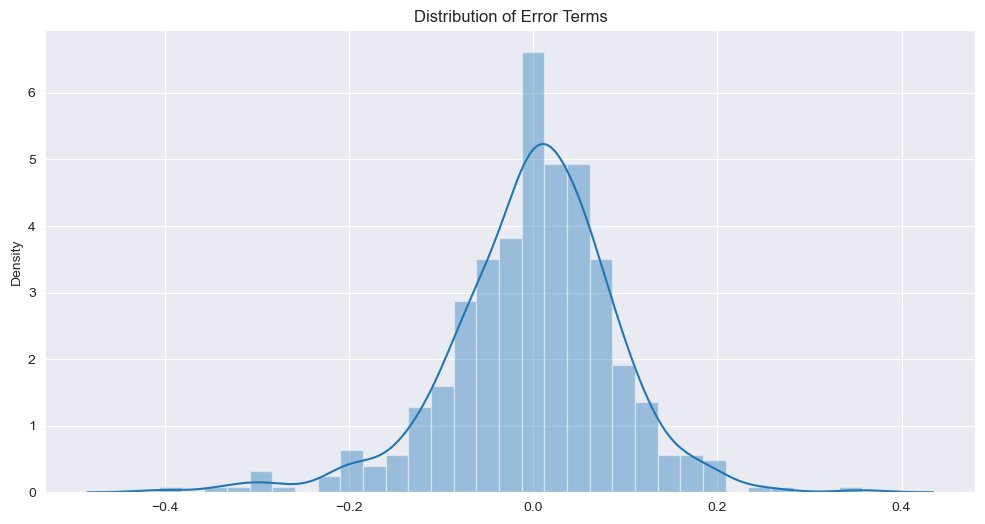

In [329]:
# Plot Residuals
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.distplot(res)
plt.title('Distribution of Error Terms')
plt.show()

<b> Model is distributed with mean zero which means it is observing the Linear Regression rules </b>

# Plotting Residual vs Predicted to look for Patterns

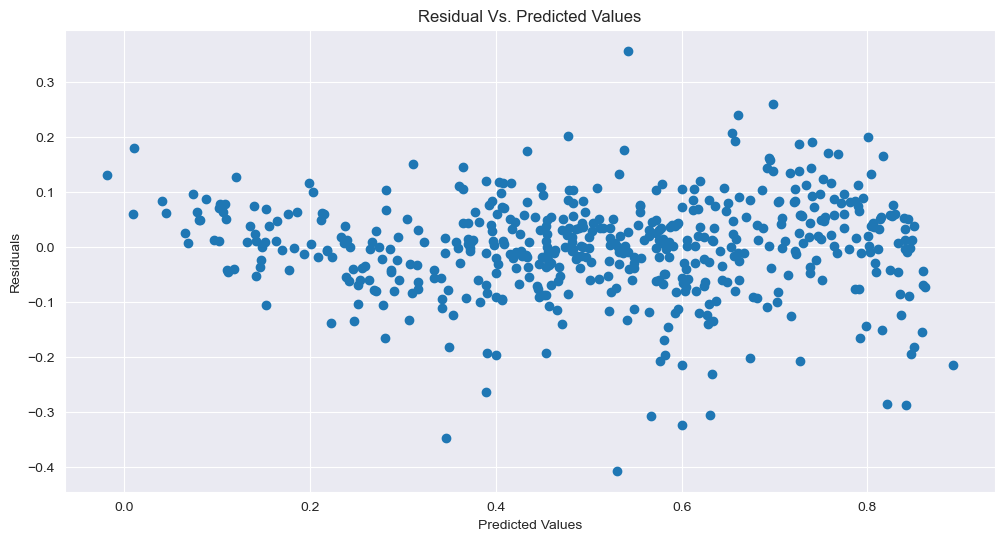

In [330]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
plt.scatter(y_train_pred,res)
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<b>No specific pattern is being observed which means that Error terms are independent of each other.</b>

# Test Dataset Evaluation 

In [332]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'Light Snow',
       'Mist', 'spring', 'winter', 'Jan', 'July', 'Sep'],
      dtype='object')

In [333]:
#Dropping the columns which were eliminated during the Training Process
X_test_sm = X_test_sm[X_train_rfe.columns]
X_test_sm.head()

,const,yr,holiday,temp,hum,windspeed,Light Snow,Mist,spring,winter,Jan,July,Sep
184,1.0,0,1,0.831783,0.657364,0.084219,0,1,0,0,0,1,0
535,1.0,1,0,0.901354,0.610133,0.153728,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,1,0,1,0,0,0
221,1.0,0,0,0.881625,0.437098,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,0,0,0,0,0,0,0


In [335]:
# Predict the Price for Test Data using the Trainned Model
y_test_pred = lm.predict(X_test_sm)

491    0.622810
159    0.594328
278    0.518407
175    0.575091
677    0.655273
dtype: float64

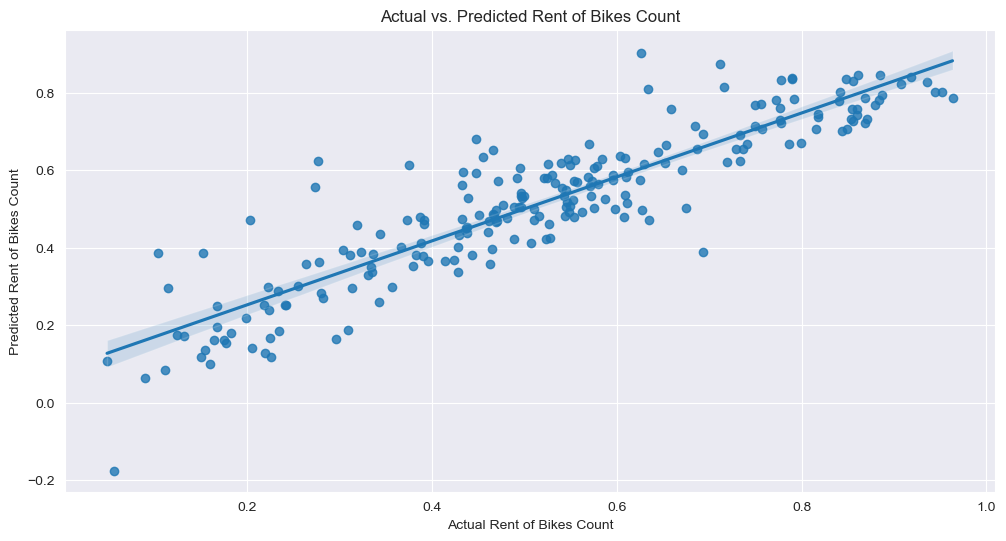

In [336]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count')
plt.xlabel('Actual Rent of Bikes Count')
plt.ylabel('Predicted Rent of Bikes Count')
plt.show()

<b>Most the data points are around the Actual Vs Predicted Line</b>

In [337]:
# Checking the Accuracy of the Test Model
r2_score(y_test,y_test_pred)

0.814221074227889

<B>Final Model accuracy is around 81.4% and the difference is around 2.6% which should be acceptable</B>

In [338]:
Cofficients = round(lm.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp          0.46
const         0.35
yr            0.23
Sep           0.06
winter        0.05
Jan          -0.04
Mist         -0.06
July         -0.08
holiday      -0.10
spring       -0.10
hum          -0.15
windspeed    -0.18
Light Snow   -0.25
dtype: float64

In [339]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.46 * temp + 0.35 * const + 0.23 * yr + 0.06 * Sep + 0.05 * winter + -0.04 * Jan + -0.06 * Mist + -0.08 * July + -0.1 * holiday + -0.1 * spring + -0.15 * hum + -0.18 * windspeed + -0.25 * Light Snow + 

<B>Best Fit Line Equation:</B>
    
<B>cnt = 0.46 * temp + 0.23 * yr + 0.06 * Sep + 0.05 * winter + -0.04 * Jan + -0.06 * Mist + -0.08 * July + -0.1 * holiday + -0.1 * spring + -0.15 * hum + -0.18 * windspeed + -0.25 * Light Snow +  0.35</B>

### Final Assessment:

    1. Temperature has the more significant impact on the business
    
    2. Weather conditions like Humidity, WindSpeed amd Light Snow has negative impact on the demand on Bikes.
    
    3. Fall and Winter is when demand for the Bikes are higher especially the month of September whereas it is lowest in the  month of January
    
    4. Holidays have a negative impact on the demand of Boom Bikes
    
    5. Rather than weekends the demands is higher over the weekdays
    
    6. Boom Bikes can expect 35% growth year on year
